# Synthèse pa rla méthode de la réponse impulsionnelle


Fc =  8000


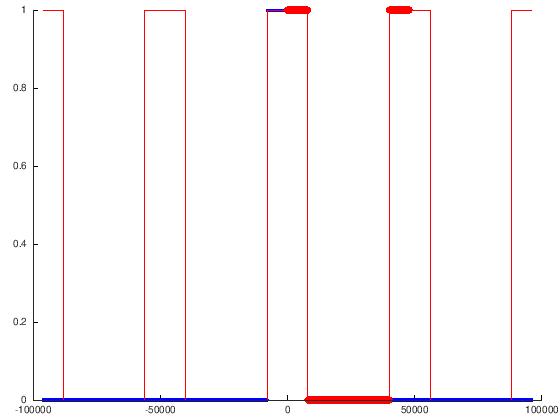

In [49]:
clear all;
u = @(x) x >= 0 ;
p = @(x,a,b) (x>=a).*(x<=b) ;
Fe = 48e3;
M = 3;
B = Fe/M;
Fc = B/2
Hc =@(f) p(f,-Fc,+Fc);
f=-2*Fe:1:2*Fe;
plot(f,Hc(f),'b.'); box off;

Htfsd = @(f) Hc(mod(f+Fe/2,Fe)-Fe/2);
hold on;
plot(f,Htfsd(f),'r');

N=256;
n=0:(N-1);
fd = n*Fe/N;
plot(fd,Htfsd(fd),'ro');

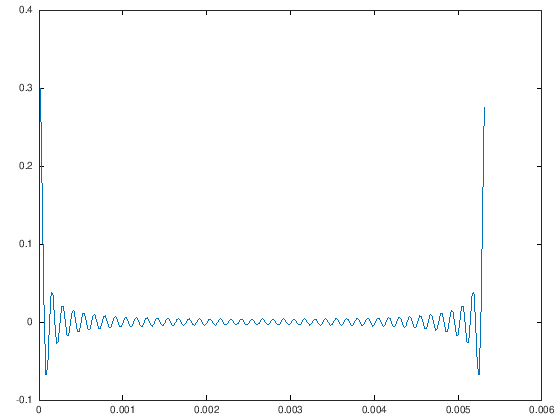

In [50]:
Te=1/Fe;
t=(0:length(f)-1)*Te;
td = n*Te;
plot(td,real(ifft(Htfsd(fd))));

# 2 - Méthode de la réponse impulsionnelle

On désire réaliser un filtre coupe bas idéal de fréquence de coupure $\tilde{f_c}$ directement en numérique par la méthode de la réponse impulsionnelle.

Pour cela on procède en plusieurs étapes :
  - a) Donner le transformée continue idéale du filtre voulu $\hat{H}(f)$ **choisir $f_c$**
  - b) En déduire la réponse impulsionnelle continue $t\mapsto h(t)$
  - c) Rendre $h$ à support borné (fenêtrage temporel) et causale (retard temporel) **choisir la largeur de fenêtre L** 
  - d) Échantillonner $h(t)$ pour obtenir une réponse impulsionnelle discrète finie $k\mapsto h[k]$ **choisir le nombre de points N**
  - e) On en déduit les coefficient $b_n$ du filtre FIR 

**Q1** Esquissez en échelle linéaire et en fréquence normalisée la TFSD d'un filtre passe-bas discret idéal de fréquence de coupure $\tilde{f_c}$ : vous montrerez les périodes et symétries usuelles.

**Q2** Esquissez en échelle linéaire et fréquences naturelles la TF d'un filtre passe bas idéal continu : vous montrerez les périodicités et symétries usuelles. 


## 2-A $h$ en continu

On note $\Pi_{[a, b]}(f)$ la fonction porte qui vaut 1 si $f\in[a, b]$ et 0 sinon.

Sans faire de calcul d'intégrale, utilisez la bi-dualité des transformées :

$  \dots \overset{\mathcal{F}}{\longrightarrow} s(\bullet) \overset{\mathcal{F}}{\longrightarrow} \hat{S}(\bullet) \overset{\mathcal{F}}{\longrightarrow} s(-\bullet) \overset{\mathcal{F}}{\longrightarrow} \hat{S}(-\bullet) \overset{\mathcal{F}}{\longrightarrow} s(\bullet) \overset{\mathcal{F}}{\longrightarrow} \dots $

Sachant que la transformée de la porte est un sinus cardinal : $\DeclareMathOperator{\sinc}{sinc}$
$\mathcal{F}\left\{\Pi_{[-a, a]}\right\}(f) = 2a.\sinc(2\pi.f.a)$
> Pour s'en rapeller on part du calcul direct, **sans le faire,** $\int\limits_{-a}^{a}1.e^{i2\pi.f t} dt$ et  
> - se rapelle que les $e^{i2\pi.f a} - e^{-i2\pi.f a}$ donnent un sinus $\sin(2\pi.f a)$ 
> - se rapelle que le sinus cardinal $\sinc(x)=\frac{\sin(x)}{x} \underset{x\to 0}{\sim} \frac{x}{x}=1 \neq 0$
> - se rapelle que $\hat{S}(f=0)=<\vec{s}, t\mapsto 1>=$ surface algébrique de $s$ (qui vaut ici $2a$) pour terminer la formule

**Q3** Trouvez la transformée inverse d'une porte fréquentielle $f\mapsto\Pi_{[-a; a]}(f)$ 

**Q4** Esquissez la réponse impulsionnelle $h$ du siltre continu idéal sur plusieurs pseudo-périodes du sinus cardinal. Indiquez cette période temporelle en fonction de la fréquence $f_c$

## 2-B $h$ continue fenêtrée causale


Et sachant qu'appliquer l'opérateur $H$ revient à faire une convolution dans le temps (somme des RIp)  mais aussi une multiplication des transfromées (multiplication des phaseurs) :  
$ y=s\star h \overset{\mathcal{F}}{\longrightarrow} Y = \hat{S}.\hat{H}$ 

Sans faire de démonstration, utilisez la dualité suivante dans le cas où $h$ et $s$ sont paires :

$  \dots \overset{\mathcal{F}}{\longrightarrow} s(\bullet) \overset{\mathcal{F}}{\longrightarrow} \hat{S}(\bullet) \overset{\mathcal{F}}{\longrightarrow} s(\bullet) \overset{\mathcal{F}}{\longrightarrow} \hat{S}(\bullet) \overset{\mathcal{F}}{\longrightarrow} s(\bullet)  \overset{\mathcal{F}}{\longrightarrow} \dots $  

Pour prolonger 
$  \dots \overset{\mathcal{F}}{\longrightarrow} s \star h \overset{\mathcal{F}}{\longrightarrow} \hat{S}.\hat{H} \overset{\mathcal{F}}{\longrightarrow} \dots $

Pour trouver que le dual du théorème du filtrage et le théorème du fenêtrage temporel sont duaux.

**Q5** Coupez le signal $h$ pour le rendre à support borné : **évitez les discontinuités !** On aura donc un nombre $M$ de pseudo périodes du sinus cardinal. Montrez que cela revient à multiplier $h$ par une fenêtre temporelle $t\mapsto \Pi[-L, L](t)$. On donnera la relation entre $L$, $M$ et $f_c$.

**Q6** Il est dur de tracer ce que devient le spectre car il s'agit d'une convolution d'un rectangle par un sinuscardinal. Cela consiste à "arrondir les angles du rectangle" avec une forme de sinus cardinal. Donnez tout de même la période d'oscillation en fréquence de ce sinus cardinal en fonction de $L$ ou de $M$ et $f_c$. Vaut-il mieux agrandir la fenêtre avec M grand ou la réduire ?



## 2-C h discrète 

Rappelez vous que le dual d'une SdF qui à un temporel périodique associe un fréquentiel est la TFSD qui...




## Virgule fixe

>    * voire  Si vous voulez être frugale et calculer avec des nombres entiers (float coûte cher sur un micro-contrôleur !), il faudra passer en échelle nano (on multiplie x et y par $10^{-9}$) :  
> $10^9.y[k+1] = 10^9.y[k] + 10420 \left(x[k+1] +x[k]\right)$.  
> inutile de multiplier $y$ par $10^{-9}$ à chaque fois, il suffit de noter que $x$ est en unité de base et que $y$ est en nano :  
> $y_n[k+1] = y_n[k] + 1042 \left(x[k+1] +x[k]\right)$, avec $y_n=10^9.y$   
> on est encore plus frugale en remplaçant la multiplication $\times 10^9$ coûteuse par $\times 2^{30}$ qui consiste à décaler le nombre de 30 bits. La constante devient $ 1,042.10^{-5}\times2^{30} = 11188,389\dots\approx 11188$ on obtient alors :  
>  $y_{30}[k+1] = y_{30}[k] + 11188 \left(x[k+1] +x[k]\right)$, avec $y_{30}=2^{30}.y$ soit `y<<30` en langage C  
> La valeur $11188$ (se codant sur 13 bits) correspond au codage du nombre à virgule $0,00001042$ au format dit à virgule fixe 2.30 (pour un registre 32 bits contenant ce nombre dont seul les 13 derniers bits sont significatifs).
> Si x occupe 12 bits sur 16 bits (valeur d'un ADC de résolution 12 bits stockée en 16 bits dans la ram), il faudra multiplier par le nombre $b$ occupants 13 bits stockés, le produit nécessite de stocker 12+13=25 bits significatifs dans un registre 32 bits au format vf2.30. 
 